In [1]:
import sys
sys.path.append("/home/user122b/few-shot-learning")
from data_utils import *

In [2]:
import os
a = os.listdir("/home/user122b/few-shot-learning/data")
for item in a:
    print(f"'{item}' :", f'load_{item}(),')


'ethos-national_origin' : load_ethos-national_origin(),
'ethos-binary' : load_ethos-binary(),
'mr' : load_mr(),
'poem-sentiment' : load_poem-sentiment(),
'loading_dataset.ipynb' : load_loading_dataset.ipynb(),
'trec' : load_trec(),
'subj' : load_subj(),
'rte' : load_rte(),
'dbpedia' : load_dbpedia(),
'ethos-race' : load_ethos-race(),
'ethos-gender' : load_ethos-gender(),
'tweet-stance_atheism' : load_tweet-stance_atheism(),
'sbic' : load_sbic(),
'civil_comments' : load_civil_comments(),
'esnli' : load_esnli(),
'cb' : load_cb(),
'cr' : load_cr(),
'slot-movies' : load_slot-movies(),
'agnews' : load_agnews(),
'sst2' : load_sst2(),
'tweet-stance_feminist' : load_tweet-stance_feminist(),
'ethos-violence' : load_ethos-violence(),
'wnli' : load_wnli(),
'lama' : load_lama(),
'tweet-irony' : load_tweet-irony(),
'tweet-offensive' : load_tweet-offensive(),
'atis' : load_atis(),
'ethos-disability' : load_ethos-disability(),
'creak' : load_creak(),
'financial-phrasebank' : load_financial-phrasebank

In [4]:
import pandas as pd
import nltk
import collections
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def get_top_words(texts, top_k):
    # Flatten list of texts and split into individual words
    words = [word for text in texts for word in text.split()]
    # Filter out stopwords
    words = [word for word in words if word not in stop_words]
    # Count frequency of each word
    word_count = collections.Counter(words)
    # Get the top K words
    top_words = [word for word, _ in word_count.most_common(top_k)]
    return set(top_words)

# Load the datasets
# Note: Replace 'load_dataset' with the actual function to load each dataset
datasets = {
    'sst2' : load_sst2()[:2],
    'mr' : load_mr()[:2],
    'cr' : load_cr()[:2],
    'trec' : load_trec()[:2],
    'subj' : load_subj()[:2],
    'financial-phrasebank' : load_financial_phrasebank()[:2],
    'poem-sentiment' : load_poem_sentiment()[:2],
    'dbpedia' : load_dbpedia()[:2],
    'cb' : get_cb()[:2],
    'agnews' : load_agnews()[:2],
    'rte' : load_rte()[:2],
    'wnli' : load_wnli()[:2],
    'mnli' : load_mnli()[:2],
    'esnli' : load_esnli()[:2],
    'sick' : load_sick()[:2],
    'creak' : load_creak()[:2],
    'sbic' : load_sbic()[:2],
    'civil-comments' : load_civil_comments()[:2],
    'hate-speech18' : load_hate_speech18()[:2],
    'tweet-hate' : load_tweet_hate()[:2],
    'tweet-irony' : load_tweet_irony()[:2],
    'tweet-offensive' : load_tweet_offensive()[:2],
    'tweet-stance_feminist' : load_tweet_feminist()[:2],
    'tweet-stance_atheism' : load_tweet_atheism()[:2],
    'ethos-binary' : load_ethos_binary()[:2],
    'ethos-race' : load_ethos_race()[:2],
    'ethos-gender' : load_ethos_gender()[:2],
    'ethos-national_origin' : load_ethos_national_origin()[:2],
    'ethos-religion' : load_ethos_religion()[:2],
    'ethos-viloence' : load_ethos_violence()[:2],
    'ethos-disabiliaty' : load_ethos_disability()[:2],
}

# Get the top 10K words from each dataset
top_words = {name: get_top_words(sentences, 10000) for name, (sentences, labels) in datasets.items()}

# Calculate vocabulary overlap between datasets
overlap = pd.DataFrame(index=datasets.keys(), columns=datasets.keys())
for name1, words1 in top_words.items():
    for name2, words2 in top_words.items():
        overlap.loc[name1, name2] = len(words1 & words2) / len(words1 | words2)

print(overlap)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/user122b/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                           sst2        mr        cr      trec      subj  \
sst2                        1.0  0.592357  0.190571  0.107481  0.447283   
mr                     0.592357       1.0  0.200418  0.111667   0.49421   
cr                     0.190571  0.200418       1.0  0.106506  0.205354   
trec                   0.107481  0.111667  0.106506       1.0  0.126951   
subj                   0.447283   0.49421  0.205354  0.126951       1.0   
financial-phrasebank   0.097096  0.099563  0.134261  0.100594  0.111925   
poem-sentiment         0.064212  0.066927  0.075312  0.044716  0.070113   
dbpedia                0.124606  0.129816  0.123976  0.178134  0.150947   
cb                     0.097005  0.100446  0.126632   0.07977  0.104274   
agnews                 0.148765  0.155535  0.158915  0.165365  0.180847   
rte                    0.137656  0.144689  0.140438  0.163603  0.172608   
wnli                   0.050395  0.053456  0.079497   0.05049  0.057791   
mnli                   0.

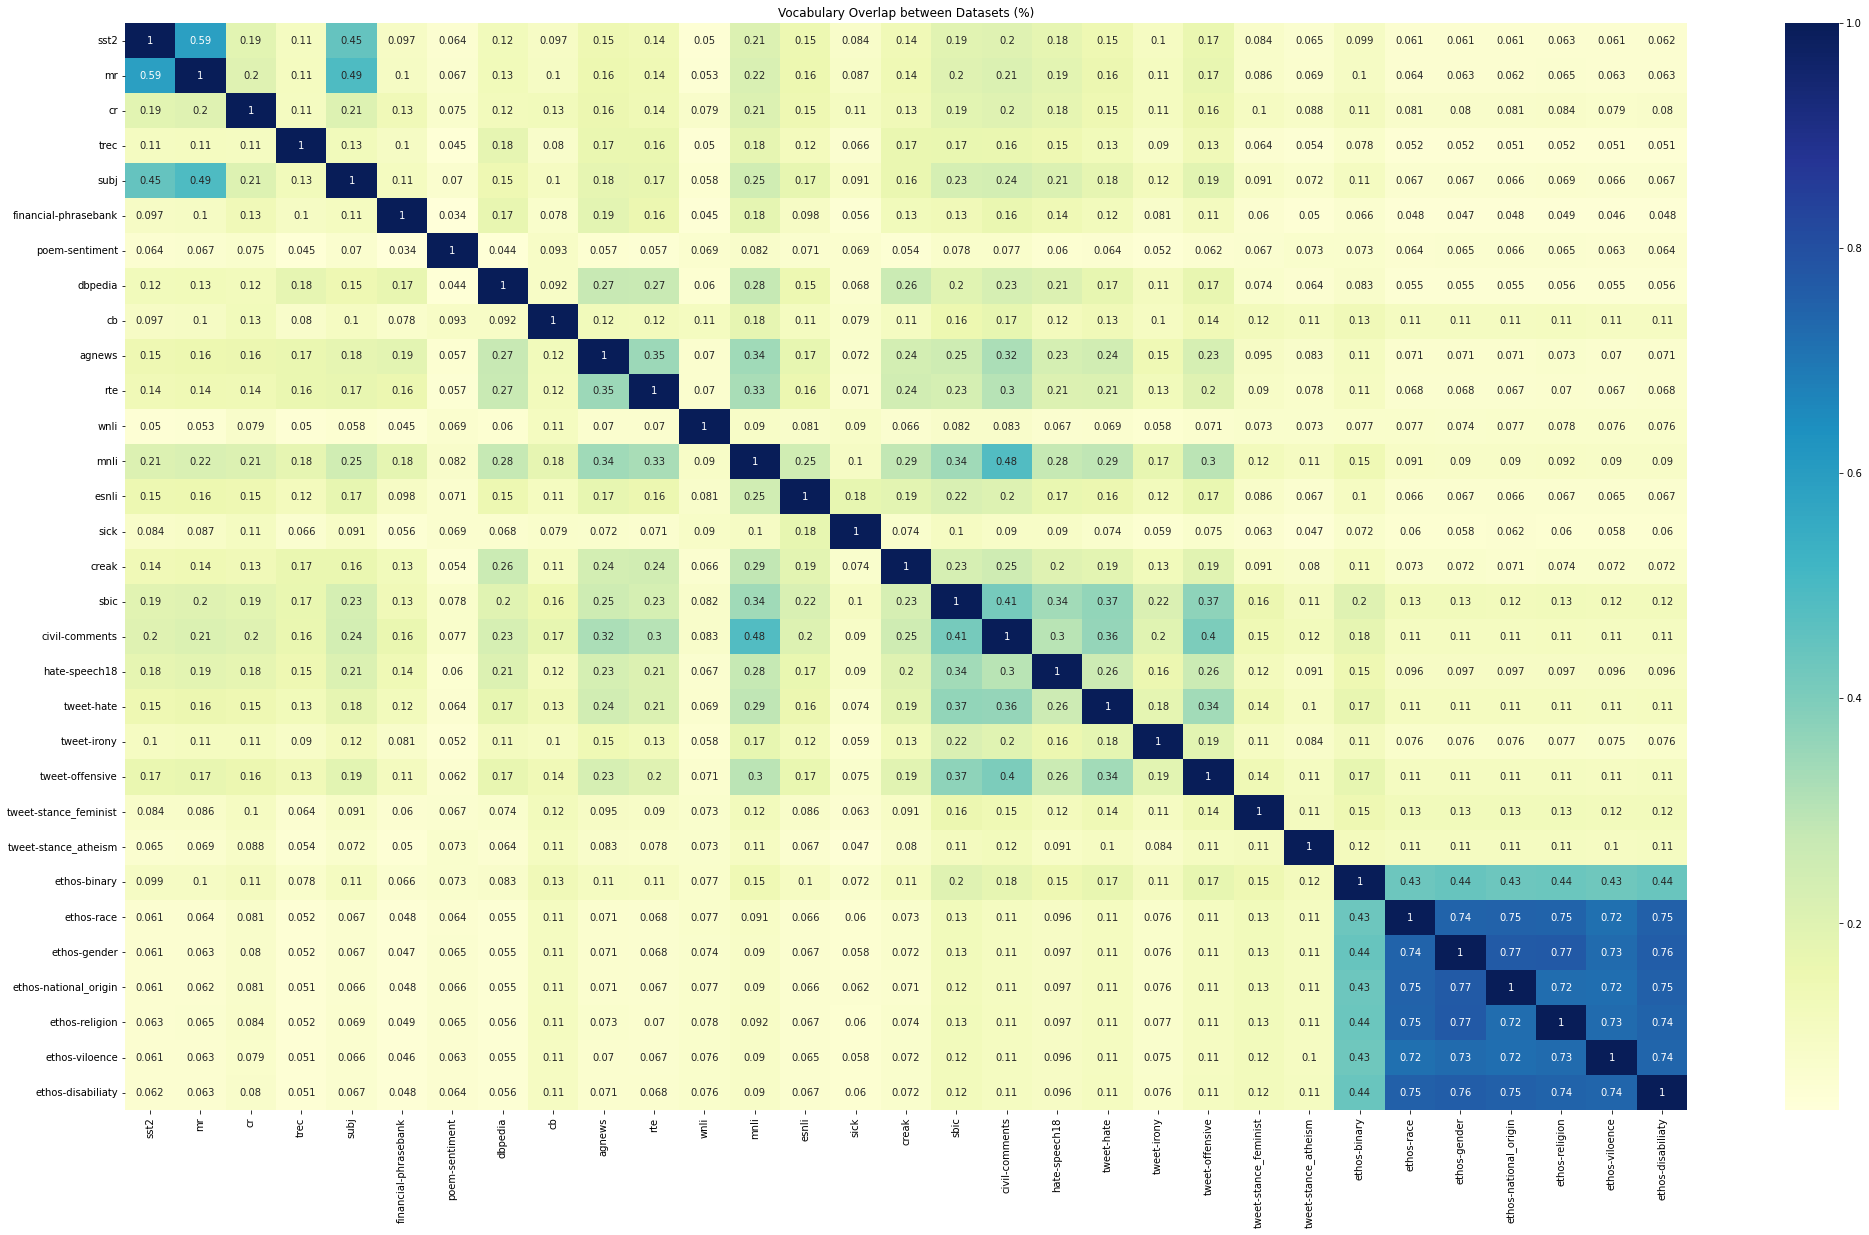

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

overlap = overlap.applymap(pd.to_numeric, errors='coerce')

plt.figure(figsize=(35, 20)) 
sns.heatmap(overlap, annot=True, cmap='YlGnBu')
plt.title("Vocabulary Overlap between Datasets (%)")
plt.show()

In [7]:
overlap.nlargest(4, 'esnli')

,sst2,mr,cr,trec,subj,financial-phrasebank,poem-sentiment,dbpedia,cb,agnews,...,tweet-offensive,tweet-stance_feminist,tweet-stance_atheism,ethos-binary,ethos-race,ethos-gender,ethos-national_origin,ethos-religion,ethos-viloence,ethos-disabiliaty
esnli,0.151941,0.156470,0.149558,0.119821,0.174674,0.098122,0.071118,0.154068,0.109881,0.174260,...,0.167883,0.086444,0.066908,0.103113,0.065568,0.066725,0.066042,0.067231,0.064963,0.066525
mnli,0.208386,0.219735,0.208178,0.180080,0.248595,0.181556,0.081738,0.278527,0.178556,0.341202,...,0.297690,0.124439,0.105577,0.147097,0.091049,0.090467,0.089939,0.092254,0.089548,0.090089
sbic,0.194386,0.203152,0.188867,0.167747,0.231906,0.133986,0.077650,0.198897,0.155974,0.253447,...,0.372307,0.159400,0.113746,0.202085,0.125896,0.126396,0.124289,0.126802,0.122445,0.123629
civil-comments,0.202357,0.214550,0.200128,0.163738,0.238774,0.163209,0.076910,0.229105,0.174300,0.322664,...,0.403509,0.145178,0.121065,0.179410,0.109470,0.108851,0.107458,0.110581,0.106512,0.108381


In [25]:
overlap['hate-speech18']

ethos-national_origin    0.096581
ethos-binary             0.147565
mr                       0.186662
poem-sentiment           0.060345
trec                     0.149954
subj                     0.212048
rte                      0.207657
dbpedia                  0.209995
ethos-race               0.096391
tweet-stance_atheism     0.091338
cb                       0.120138
cr                       0.177629
agnews                   0.232742
tweet-stance_feminist    0.118585
sst2                     0.178481
wnli                     0.066667
tweet-irony              0.159219
tweet-offensive          0.261830
financial-phrasebank     0.143117
ethos-religion           0.097101
hate-speech18            1.000000
tweet-hate               0.258336
Name: hate-speech18, dtype: float64